In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [22]:
def mnk_intercept(X, Y, resolution=10000):
    if isinstance(X, pd.Series): X = X.to_numpy()
    if isinstance(Y, pd.Series): Y = Y.to_numpy()
    
    a = (X@Y)/(X@X)
    min_loss = np.sum((Y - a * X)**2)
    def relative_loss(delta):
        return np.sum((Y - (a + delta) * X)**2) / min_loss
    
    delta = 0
    
    step = a / resolution
    while relative_loss(delta) < 2:
        delta += step
    
    
    def f(x):
        return a * x
    
    return a, delta, f

In [26]:
data = pd.read_csv('rings.csv')
dr = 0.2
data

,m,r
0,1,2.5
1,2,3.6
2,3,4.3
3,4,4.9
4,5,5.5
5,6,6.1
6,7,6.5
7,8,6.9
8,9,7.2


5.9697543859649125 0.16118336842105283


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


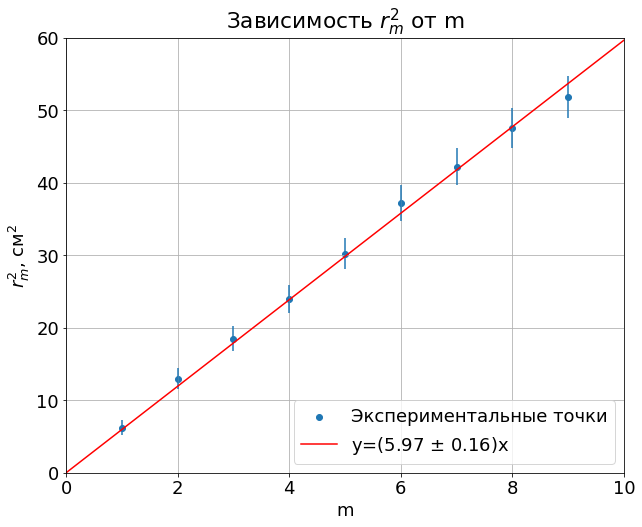

In [31]:
matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(10, 8))
plt.grid()

plt.xlabel("m")
plt.ylabel(r"$r_m^2$, см$^2$")
plt.title(r"Зависимость $r_m^2$ от m")

X = data["m"].to_numpy()
Y = data["r"].to_numpy() ** 2
dY = 2 * data["r"].to_numpy() * dr

plt.scatter(X, Y, label="Экспериментальные точки")
plt.errorbar(X, Y, yerr=dY, linestyle='')
plt.xlim(0, 10)
plt.ylim(0, 60)

a, da, f = mnk_intercept(X, Y)
print(a, da)

plt.plot([0, 60], [0, 60*a], color="red", label="y=(5.97 $\pm$ 0.16)x")
plt.legend(loc="lower right")

plt.savefig("../pictures/r_m.eps")

In [33]:
wavelength = 6328e-8
n_o = 2.29
l = 2.6
L = 65.5; dL = 0.5

n_diff = (wavelength / l) * (n_o * L)**2 / a
dn_diff = n_diff * np.sqrt((da/a)**2 + (2*dL/L)**2)

print(n_diff, dn_diff)

0.09172552874518831 0.0028450985746784475
